### ***Step 1 : Load necessary libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### ***Step 2 : Data Collection***

In [2]:
df = pd.read_csv('Salary Data.csv')

### ***Step 3 : Data Exploration and visualization (EDA)***

In [3]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [4]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [5]:
df1 = df.dropna()

In [6]:
len(df1['Job Title'].unique())

174

In [7]:
df1['Gender'].nunique()

2

In [8]:
df1['Job Title'].value_counts()

Job Title
Director of Marketing             12
Director of Operations            11
Senior Business Analyst           10
Senior Marketing Manager           9
Senior Marketing Analyst           9
                                  ..
Junior Social Media Specialist     1
Junior Operations Coordinator      1
Senior HR Specialist               1
Director of HR                     1
Junior Financial Advisor           1
Name: count, Length: 174, dtype: int64

In [9]:
df1['Education Level'].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

In [10]:
df1.rename(columns={'Job Title':'Job_title', 'Education Level':'Education_Level', 'Years of Experience':'Years_of_Experience'}, inplace=True) #renaming a column
df2 = df1.copy()
df2.sample()

C:\Users\NIKHIL VERMA\AppData\Local\Temp\ipykernel_19464\2209870266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'Job Title':'Job_title', 'Education Level':'Education_Level', 'Years of Experience':'Years_of_Experience'}, inplace=True) #renaming a column


,Age,Gender,Education_Level,Job_title,Years_of_Experience,Salary
45,28.0,Female,Bachelor's,Copywriter,2.0,40000.0


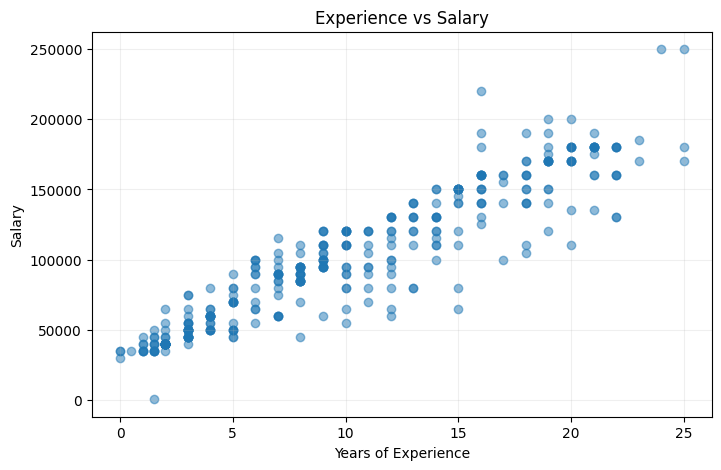

In [11]:
plt.figure(figsize=(8,5))

plt.scatter(data=df2, x='Years_of_Experience', y='Salary', alpha = 0.5)

plt.title('Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.grid(True, alpha = 0.2)
plt.show()

### ***Step 4 : Removing Outliers***

In [12]:
df2.Job_title = df2.Job_title.apply(lambda x: x.strip())

In [13]:
Job_title_stats = df2.groupby('Job_title')['Job_title'].agg('count').sort_values(ascending=False)
Job_title_stats

Job_title
Director of Marketing       12
Director of Operations      11
Senior Business Analyst     10
Senior Marketing Analyst     9
Senior Marketing Manager     9
                            ..
UX Designer                  1
UX Researcher                1
VP of Finance                1
VP of Operations             1
Web Developer                1
Name: Job_title, Length: 174, dtype: int64

In [14]:
len(Job_title_stats[Job_title_stats <= 2])

134

In [15]:
Job_title_stats_less_than_2 = Job_title_stats[Job_title_stats <= 2]
Job_title_stats_less_than_2

Job_title
Director of Human Resources    2
Event Coordinator              2
Customer Service Manager       2
Director of Finance            2
Business Analyst               2
                              ..
UX Designer                    1
UX Researcher                  1
VP of Finance                  1
VP of Operations               1
Web Developer                  1
Name: Job_title, Length: 134, dtype: int64

In [16]:
df2.Job_title = df2.Job_title.apply(lambda x: 'other' if x in Job_title_stats_less_than_2 else x)

In [17]:
Salary_stats = df2.groupby('Salary')['Salary'].agg('count').sort_values(ascending=False)
Salary_stats.tail(10)

Salary
250000.0    2
135000.0    2
175000.0    2
30000.0     1
350.0       1
125000.0    1
155000.0    1
145000.0    1
185000.0    1
220000.0    1
Name: Salary, dtype: int64

In [18]:
len(Salary_stats[Salary_stats <= 2])

11

##### **I asked from chatgpt**

In [19]:
# Step 1: Get salary frequencies
salary_counts = df2['Salary'].value_counts()

# Step 2: Filter to keep only salaries that appear more than once
common_salaries = salary_counts[salary_counts > 2].index

# Step 3: Filter the dataframe to keep only those rows
df2 = df2[df2['Salary'].isin(common_salaries)]

In [20]:
df2.Salary

0       90000.0
1       65000.0
2      150000.0
3       60000.0
5       55000.0
         ...   
370     85000.0
371    170000.0
372     40000.0
373     90000.0
374    150000.0
Name: Salary, Length: 358, dtype: float64

In [21]:
df2.Salary.describe()

count       358.000000
mean      98142.458101
std       45643.231468
min       35000.000000
25%       55000.000000
50%       95000.000000
75%      130000.000000
max      190000.000000
Name: Salary, dtype: float64

In [22]:
df2.Years_of_Experience.describe()

count    358.000000
mean       9.731844
std        6.363467
min        0.000000
25%        4.000000
50%        9.000000
75%       15.000000
max       25.000000
Name: Years_of_Experience, dtype: float64

### ***Step 5 : Data Preprocessing***

#### **Using Ordinal Encoding for Education column and One Hot Encoding for Gender & Job_title column**

In [23]:
from sklearn.preprocessing import OrdinalEncoder

In [24]:
education_order = [["Bachelor's", "Master's", "PhD"]]
encoder = OrdinalEncoder(categories=education_order)
df2['Education_Level'] = encoder.fit_transform(df2[['Education_Level']])

In [25]:
df2.head(3)

,Age,Gender,Education_Level,Job_title,Years_of_Experience,Salary
0,32.0,Male,0.0,other,5.0,90000.0
1,28.0,Female,1.0,other,3.0,65000.0
2,45.0,Male,2.0,other,15.0,150000.0


In [26]:
dummies = pd.get_dummies(df2.Gender)

In [27]:
dummies.head(3)

,Female,Male
0,False,True
1,True,False
2,False,True


In [28]:
dummies1 = pd.get_dummies(df2.Job_title)

In [29]:
dummies1.head(3)

,Director of Marketing,Director of Operations,Junior Accountant,Junior Business Analyst,Junior Business Development Associate,Junior Financial Analyst,Junior Marketing Analyst,Junior Marketing Coordinator,Junior Marketing Manager,Junior Marketing Specialist,...,Senior Operations Manager,Senior Product Designer,Senior Product Manager,Senior Project Coordinator,Senior Project Manager,Senior Scientist,Senior Software Developer,Senior Software Engineer,Senior UX Designer,other
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [30]:
df3 = pd.concat([df2, dummies, dummies1.drop('other',axis = 'columns')], axis = 'columns')

In [31]:
df4 = df3.drop('Gender', axis = 'columns')
df5 = df4.drop('Job_title', axis = 'columns')

In [32]:
df5.head(2)

,Age,Education_Level,Years_of_Experience,Salary,Female,Male,Director of Marketing,Director of Operations,Junior Accountant,Junior Business Analyst,...,Senior Operations Coordinator,Senior Operations Manager,Senior Product Designer,Senior Product Manager,Senior Project Coordinator,Senior Project Manager,Senior Scientist,Senior Software Developer,Senior Software Engineer,Senior UX Designer
0,32.0,0.0,5.0,90000.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,28.0,1.0,3.0,65000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
df6 = df5.astype(int)

In [34]:
df6.head(2)

,Age,Education_Level,Years_of_Experience,Salary,Female,Male,Director of Marketing,Director of Operations,Junior Accountant,Junior Business Analyst,...,Senior Operations Coordinator,Senior Operations Manager,Senior Product Designer,Senior Product Manager,Senior Project Coordinator,Senior Project Manager,Senior Scientist,Senior Software Developer,Senior Software Engineer,Senior UX Designer
0,32,0,5,90000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28,1,3,65000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### ***Step 6 Model Building***

In [35]:
X = df6.drop('Salary', axis = 'columns')
Y = df6.Salary

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 10)

In [37]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

#lr_clf : linear regression classifier
lr_clf = LinearRegression()
lr_clf.fit(X_train, Y_train)
lr_clf.score(X_test, Y_test)

0.918787239080554

In [38]:
regression.fit(X_train, Y_train)

LinearRegression()

In [39]:
Y_pred = regression.predict(X_test)

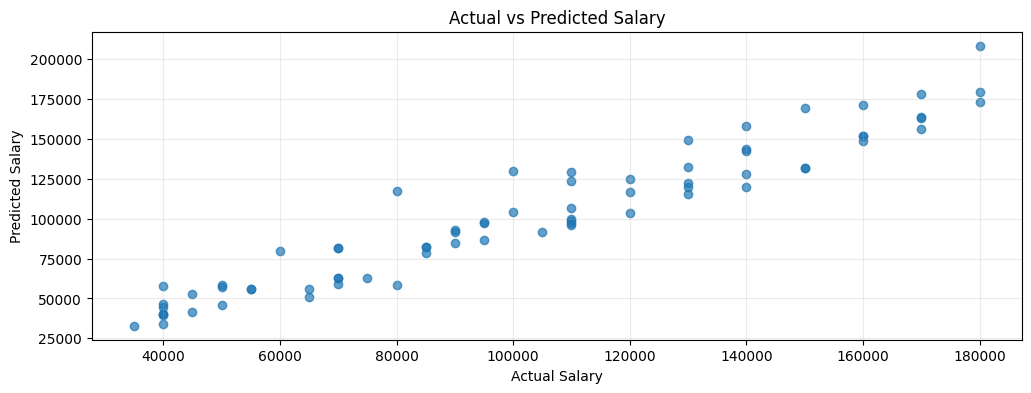

In [40]:
plt.figure(figsize = (12,4))
plt.scatter(Y_test,Y_pred,alpha = 0.7)
plt.grid(alpha = 0.25)

plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")

plt.show()

### **Final Model Prediction**

#### **For predict_salary function I took help by a Chatgpt**

In [41]:
def predict_salary(Gender, Job_title, Age, Education_Level, Years_of_Experience):
    # Find the index for the one-hot encoded Gender and Job_title
    Gender_index = np.where(X.columns == Gender)[0][0]
    job_index = np.where(X.columns == Job_title)[0][0]

    # Create input array with zeros
    x = np.zeros(len(X.columns))

    # Assign numerical feature values
    x[0] = Age
    x[1] = Education_Level
    x[2] = Years_of_Experience

    # Set one-hot encoded values
    if Gender_index >= 0:
        x[Gender_index] = 1
    if job_index >= 0:
        x[job_index] = 1

    # Predict using trained model
    return int(lr_clf.predict([x])[0])


In [42]:
df6.tail(4)

,Age,Education_Level,Years_of_Experience,Salary,Female,Male,Director of Marketing,Director of Operations,Junior Accountant,Junior Business Analyst,...,Senior Operations Coordinator,Senior Operations Manager,Senior Product Designer,Senior Product Manager,Senior Project Coordinator,Senior Project Manager,Senior Scientist,Senior Software Developer,Senior Software Engineer,Senior UX Designer
371,43,1,19,170000,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
372,29,0,2,40000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
373,34,0,7,90000,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
374,44,2,15,150000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
print(f"{predict_salary('Male', 'Senior Operations Coordinator',34,0,7)}$")

95121$


C:\Users\NIKHIL VERMA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [44]:
print(f"{predict_salary('Male', 'Director of Operations',43,1,19)}$")

152098$


C:\Users\NIKHIL VERMA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
